In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [9]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [12]:
data = data.assign(Tax = pd.cut(data['Taxable.Income'],
                              bins=[ 0, 30000, 100000],
                              labels=['Risky', 'Good']))
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [13]:
data.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","Taxable.Income":"Taxinc","City.Population":"population","Work.Experience":"experience","Urban":"urban", "Tax":"income"},inplace=True)
data.head()

,undergrad,marital,Taxinc,population,experience,urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [15]:
data.head()

,undergrad,marital,Taxinc,population,experience,urban,income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [8]:
data = data.drop(columns = ['Taxable.Income'])

In [16]:
data['income'] = le.fit_transform(data['income'])
data.tail()

,undergrad,marital,Taxinc,population,experience,urban,income
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0
599,0,0,96519,158137,16,0,0


In [17]:
data1 = data.copy()

In [18]:
fig, ax = plt.subplots(3,3, figsize = (17,12),dpi=600)

sns.distplot(data1.undergrad, ax = ax[0,0])
sns.distplot(data1.marital, ax = ax[0,1])
sns.distplot(data1.Taxinc, ax = ax[0,2])
sns.distplot(data1.population, ax = ax[1,0])
sns.distplot(data1.experience, ax = ax[1,1])
sns.distplot(data1.urban, ax = ax[1,2])
sns.distplot(data1.income, ax = ax[2,0])

plt.show()

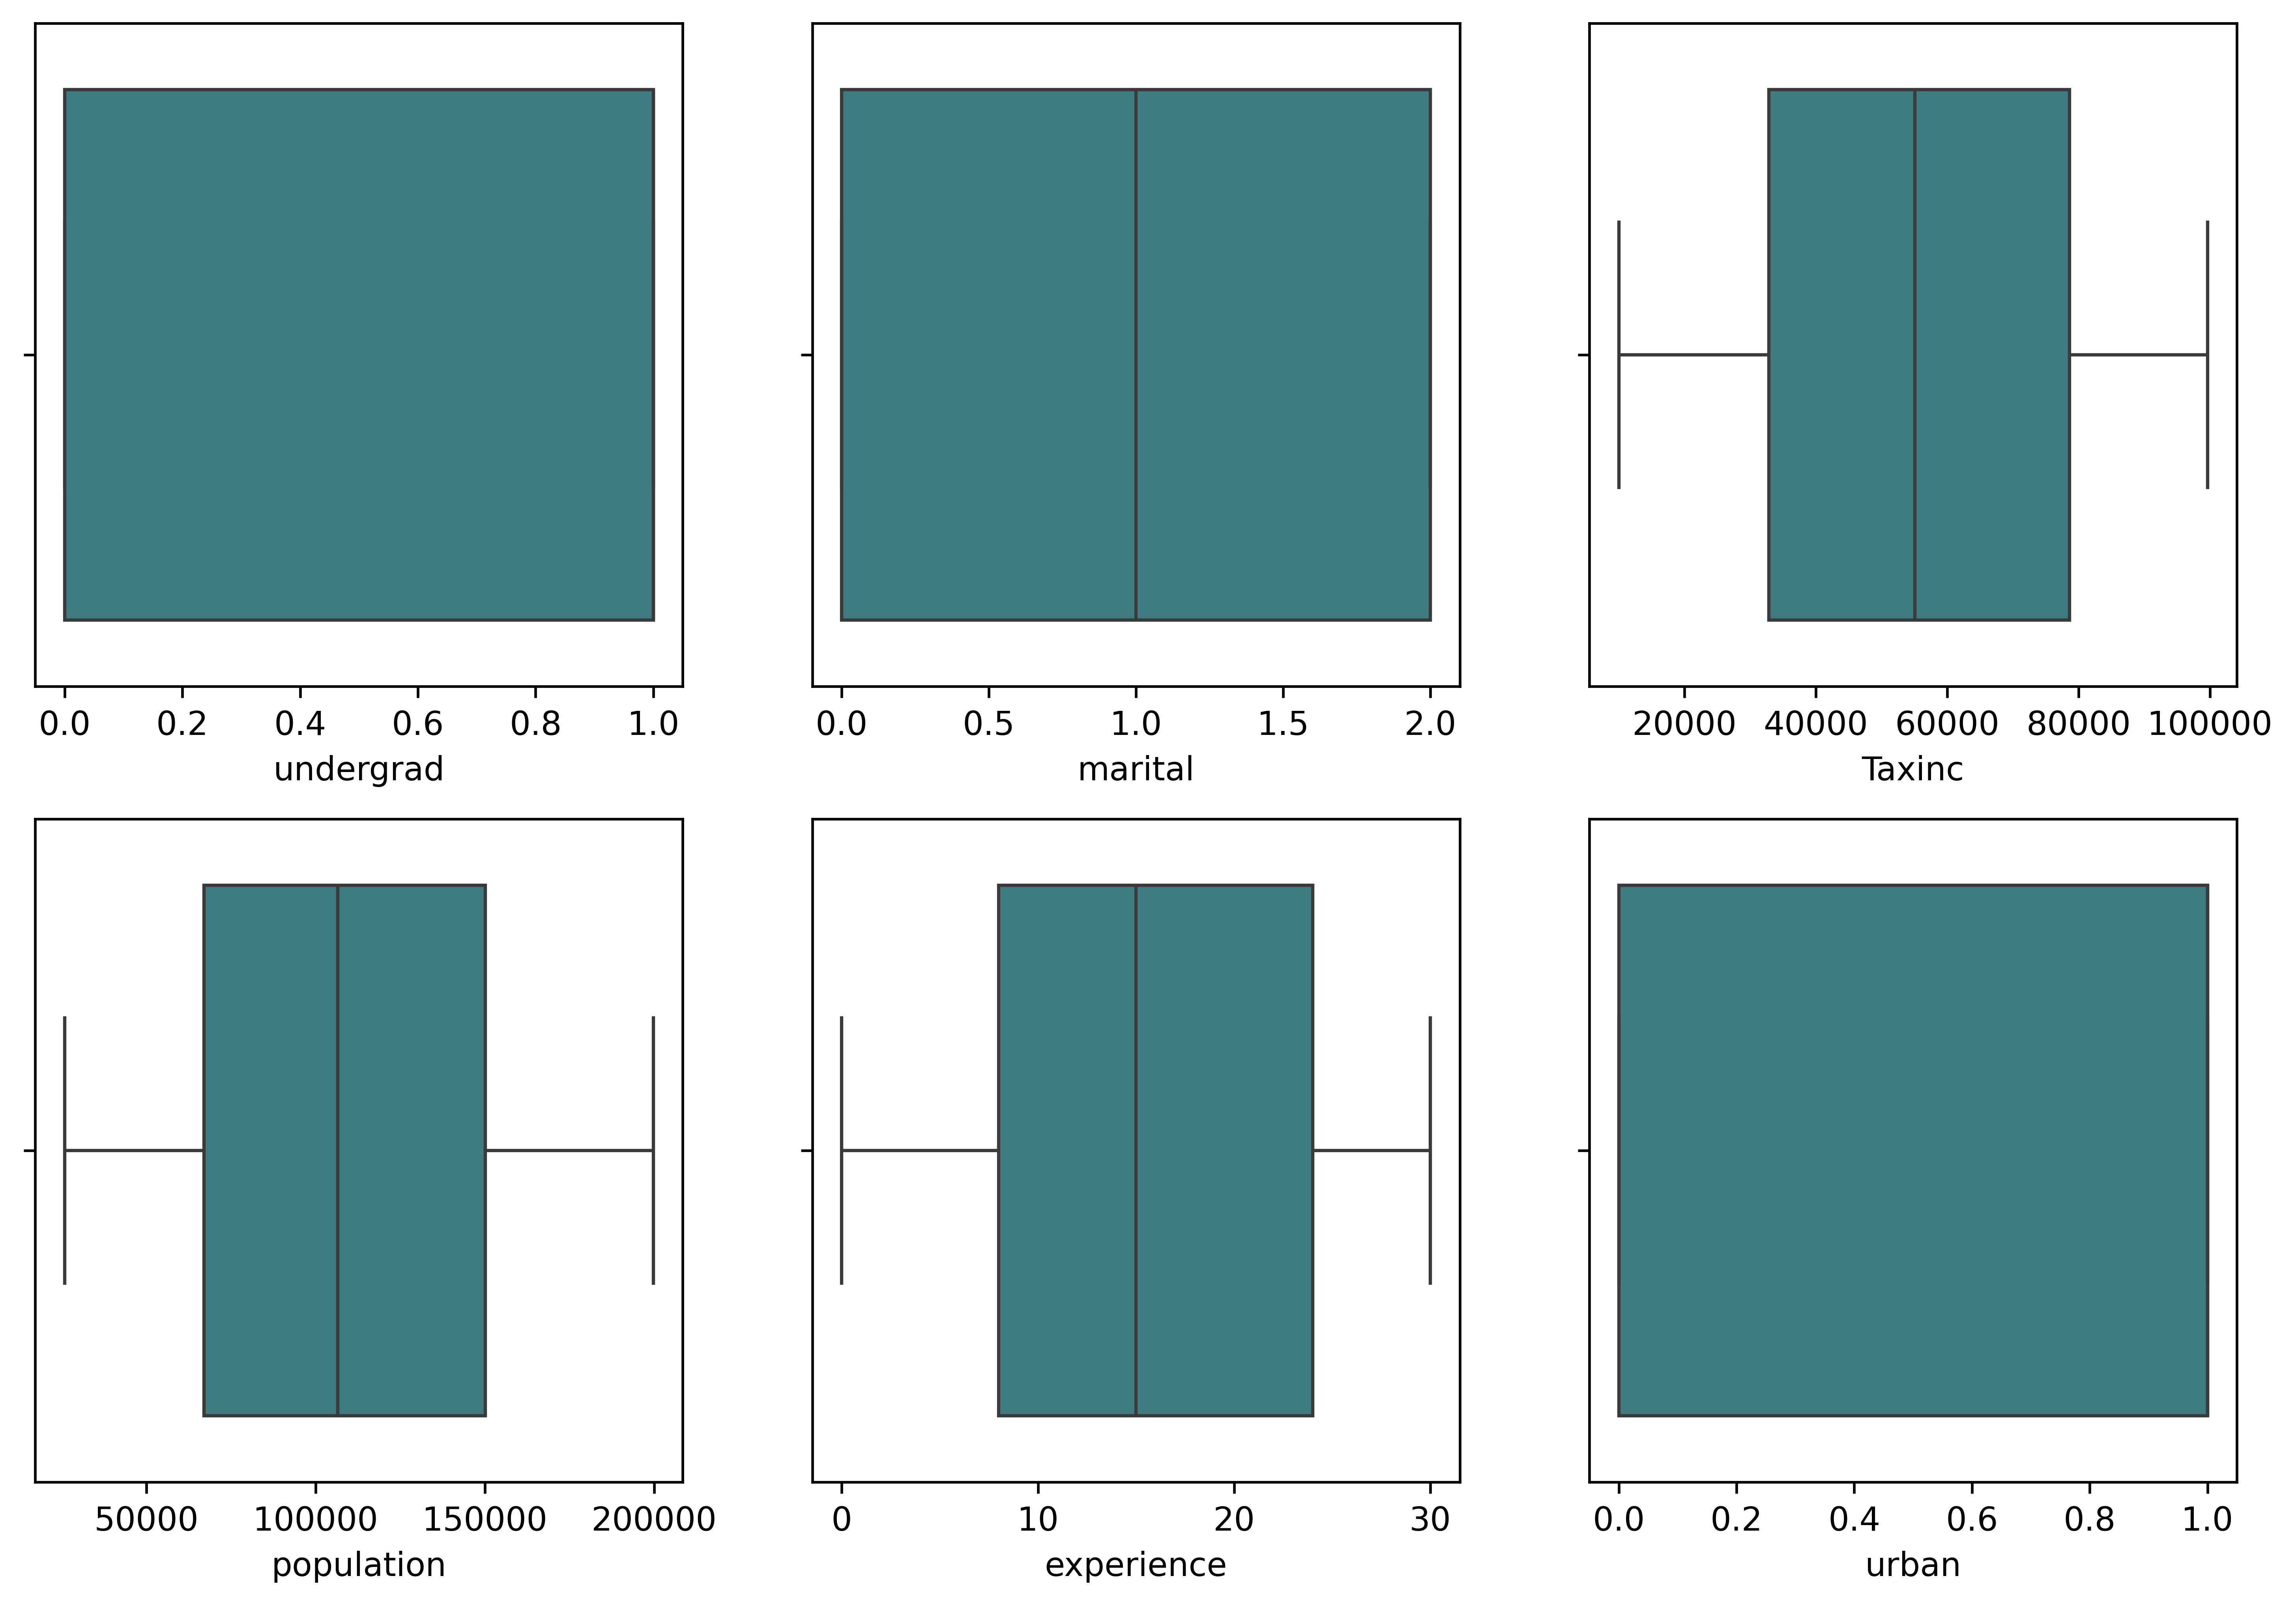

In [21]:
fig, ax = plt.subplots(2,3, figsize = (12,8),dpi=600)

sns.boxplot(data1.undergrad,palette='crest', ax = ax[0,0],orient='h')
sns.boxplot(data1.marital,palette='crest', ax = ax[0,1],orient='h')
sns.boxplot(data1.Taxinc,palette='crest', ax = ax[0,2],orient='h')
sns.boxplot(data1.population,palette='crest', ax = ax[1,0],orient='h')
sns.boxplot(data1.experience,palette='crest', ax = ax[1,1],orient='h')
sns.boxplot(data1.urban,palette='crest', ax = ax[1,2],orient='h')

plt.show()

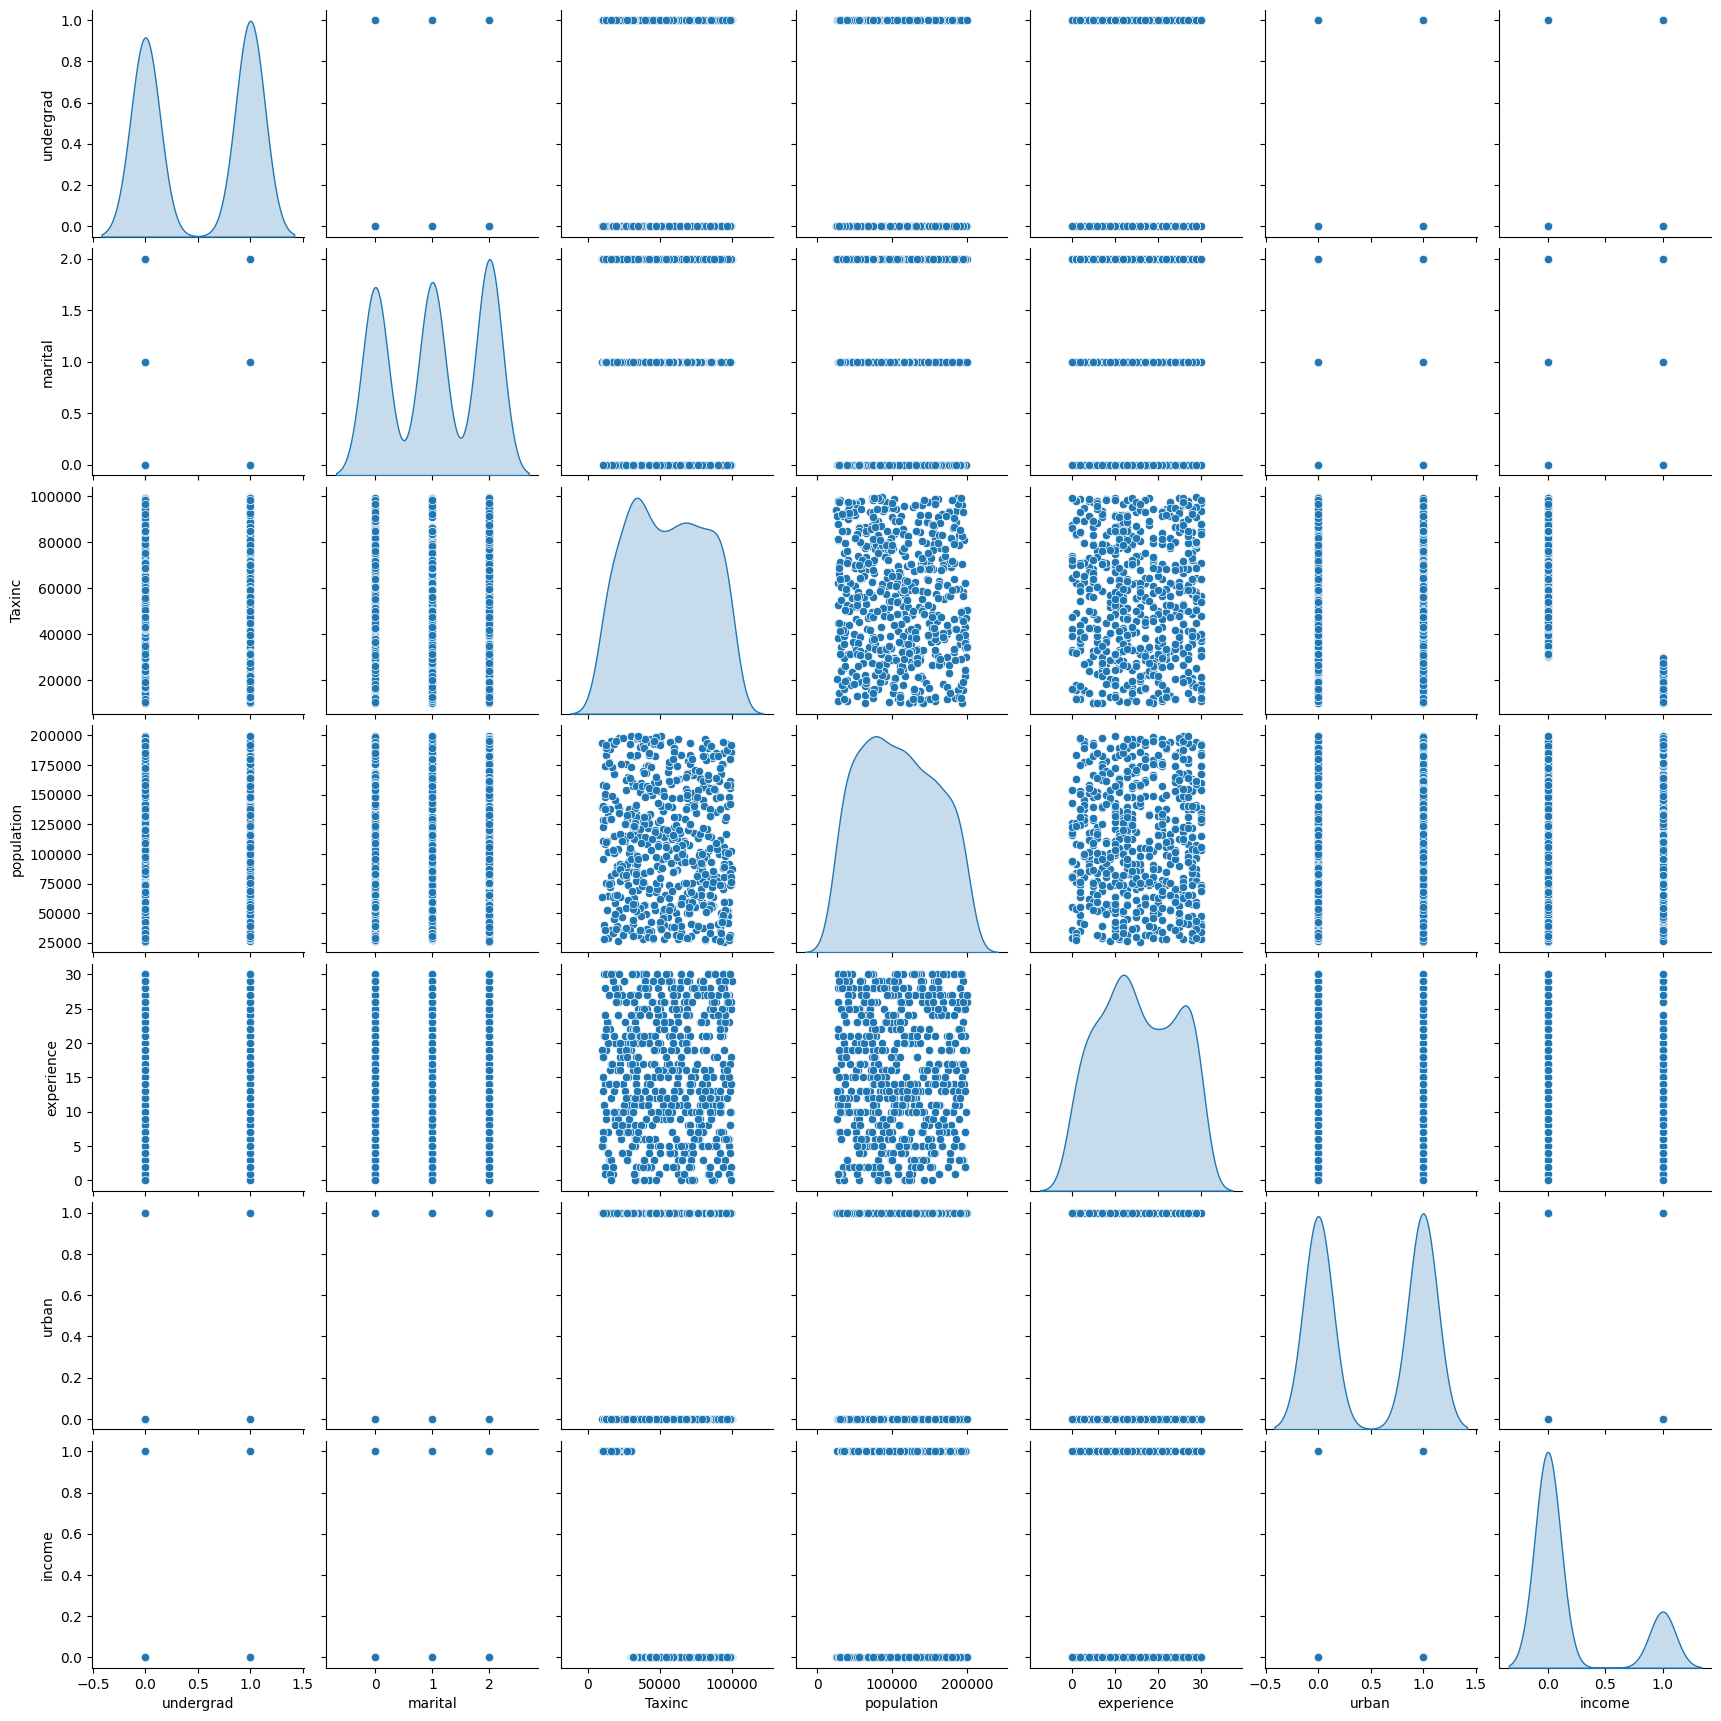

In [22]:
sns.pairplot(data1, diag_kind='kde')

<Axes: xlabel='population', ylabel='Taxinc'>

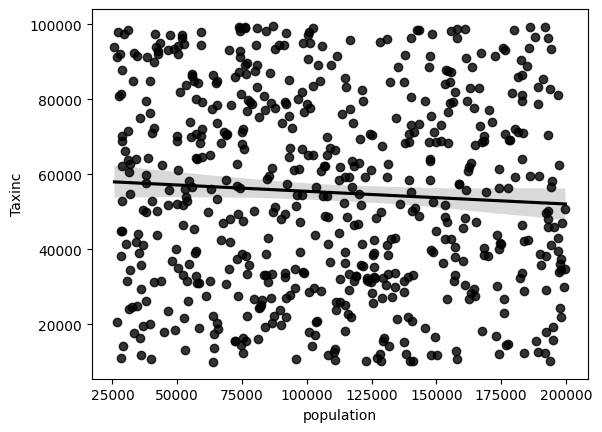

In [23]:
sns.regplot(x='population', y='Taxinc', data=data1, color='black')

<Axes: >

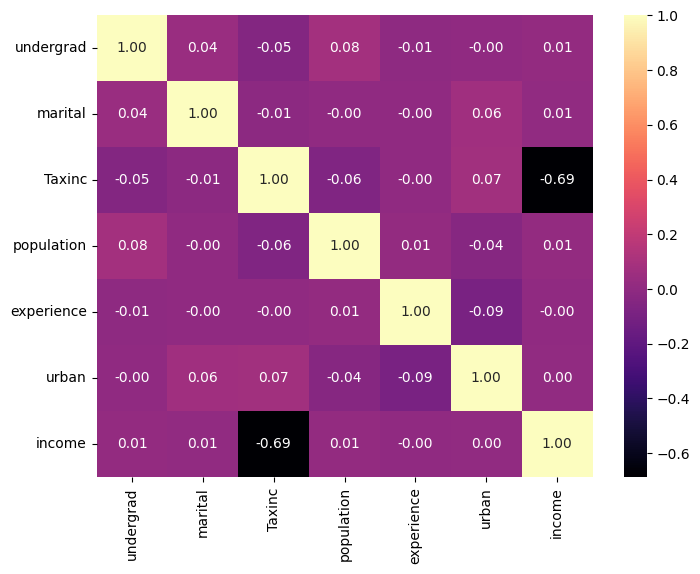

In [24]:
plt.figure(figsize = (8, 6));
sns.heatmap(data1.corr(), cmap='magma', annot=True, fmt=".2f")

In [25]:
data = data.drop(columns = ['Taxinc'])

In [26]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [27]:
# Splitting data into training and testing data set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [29]:
# Model building :
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, shuffle=False)

from sklearn.ensemble import RandomForestClassifier as RF
model = RF(max_depth=5, random_state = 55)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=55)

In [30]:
# Predictions on train data :
y_pred = model.predict(x_test)

In [31]:
# Accuracy :
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc

0.775

In [32]:
column = data
column = column.drop(columns = ['income'])
feature_imp = pd.Series(model.feature_importances_, index = column.columns)
feature_imp

undergrad     0.044571
marital       0.084820
population    0.509351
experience    0.312591
urban         0.048667
dtype: float64

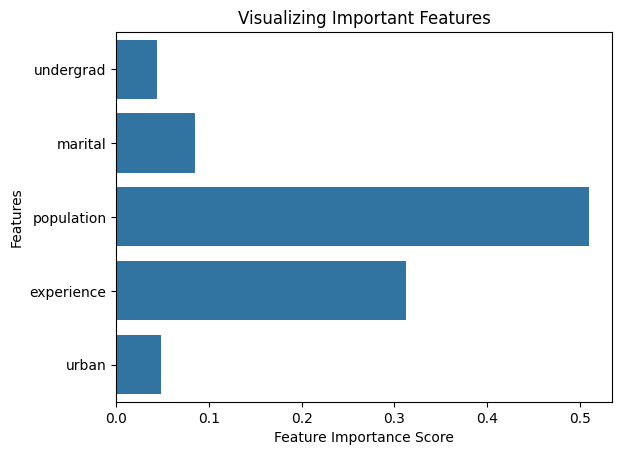

In [33]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()